In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
from torch import nn
import torch

In [ ]:
train_data = datasets.FashionMNIST(
  root="image",
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.FashionMNIST(
  root="image",
  train=False,
  download=True,
  transform=ToTensor()
)

In [ ]:
img, label = train_data[0]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
img, label = train_data[0]
class_names = train_data.classes
class_names[label]
img.shape
img.permute(1, 2, 0).shape

torch.Size([28, 28, 1])

Text(0.5, 1.0, 'Sneaker')

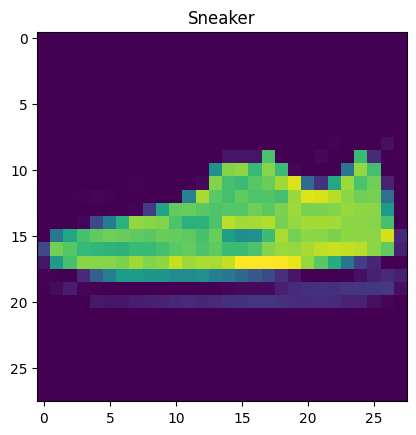

In [ ]:
random_idx = random.randint(0, len(train_data)-1)
img, label = train_data[random_idx]
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])

In [ ]:

BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle = False
)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape

torch.Size([32, 1, 28, 28])

In [ ]:
x_first_batch[0],y_first_batch[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Text(0.5, 1.0, 'Dress')

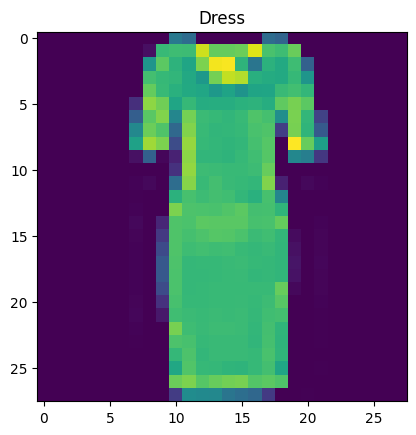

In [ ]:
random_idx = random.randint(0, len(x_first_batch)-1)
img, label = x_first_batch[random_idx], y_first_batch[random_idx]

plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])

In [ ]:
x_first_batch[0].shape

torch.Size([1, 28, 28])

In [ ]:
f = nn.Flatten(start_dim=0, end_dim=-1)
f(x_first_batch[0])

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class ImageClassificationModel(nn.Module):
  def __init__(self,input_shape, output_shape):
    super().__init__()
    self.layer_stack= nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Dropout(p=0.3),
      nn.Linear(in_features=input_shape, out_features=100),
      nn.ReLU(),
      nn.Linear(in_features=100, out_features=output_shape)
      #nn.Softmax(dim=1),因為lossfunction中也有執行softmax故刪除
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape,y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
torch.manual_seed(87)
model = ImageClassificationModel(28*28,10)
y_pred = model(x_first_batch)
y_pred

tensor([[ 5.7287e-02, -4.5194e-02, -1.1577e-01, -6.4710e-02,  1.0670e-01,
          8.7304e-02, -1.0429e-02,  1.4263e-01, -1.4671e-01,  2.2686e-02],
        [ 1.6757e-01, -8.3828e-02, -1.2149e-01,  3.7689e-02,  2.0392e-01,
          2.1348e-03, -6.5990e-02, -6.9586e-02,  3.9107e-02,  1.1211e-01],
        [ 3.8616e-02,  6.0829e-02,  1.4103e-01,  3.5314e-02,  6.4061e-02,
          2.5805e-02,  8.8655e-03, -1.0807e-01, -3.8165e-04,  1.1528e-01],
        [ 2.3585e-02,  1.2730e-01,  7.5834e-02,  1.1981e-01, -6.8269e-02,
          3.1624e-02,  1.6112e-03, -1.7374e-01,  8.4889e-02,  1.0407e-02],
        [ 7.3125e-02, -2.3997e-02,  1.2441e-01,  1.4360e-01, -2.8291e-02,
          8.2959e-02,  7.1306e-02, -1.4679e-01,  1.3560e-01, -1.9354e-02],
        [ 1.4576e-01,  2.7367e-02,  5.8119e-03,  6.1591e-02,  1.0729e-01,
         -3.6123e-02, -1.9706e-04, -3.1537e-01,  3.5023e-02, -7.6562e-02],
        [ 3.7811e-02, -8.8071e-02,  1.6267e-02,  2.7436e-02,  9.2666e-02,
          1.4172e-01, -5.9179e-0

In [ ]:
y_first_batch

tensor([1, 0, 8, 4, 8, 3, 2, 6, 3, 4, 3, 6, 4, 0, 1, 8, 5, 3, 4, 0, 9, 8, 4, 4,
        4, 1, 8, 8, 1, 4, 3, 5])

In [ ]:
cost_fn = nn.CrossEntropyLoss()
y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch) #已將y_first_batch 做onehot (tensorflow須設定)
print(cost)
print(model.state_dict())

optimizer = torch.optim.SGD(params=model.parameters(), lr= 0.0045)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

tensor(2.2738, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.2.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0324, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0204,  0.0296, -0.0310],
        ...,
        [-0.0326,  0.0243,  0.0171,  ...,  0.0259, -0.0348,  0.0155],
        [ 0.0285, -0.0217,  0.0329,  ..., -0.0054,  0.0221, -0.0229],
        [ 0.0016,  0.0171,  0.0221,  ..., -0.0113, -0.0222, -0.0106]])), ('layer_stack.2.bias', tensor([-8.7678e-05,  6.9116e-03,  2.1466e-02, -3.0031e-02, -2.0588e-02,
        -2.9523e-02,  1.5793e-03, -3.2348e-02, -3.7860e-03, -7.0510e-03,
        -5.3662e-03,  1.7467e-02,  1.2004e-02, -2.1697e-02, -1.4577e-02,
         3.8082e-03,  1.4872e-02, -1.1800e-02,  2.4788e-02, -1.2057e-02,
         1.6760e-02, -2.3474e-02,  2.6597e-02, -1.5559e-02, -2.1384e-02,
        -3.4645e-02, -1.8406e-02,  2.7766e-02, -1.3521e-02,  3.4028e-02,
         3.5049e-03, -

In [ ]:
def accuracy_fn(y_pred, y_true):
  correct_num = (y_pred == y_true).sum()
  acc = correct_num / len(y_true) *100
  return acc

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
model.to(device)

NameError: ignored

In [ ]:
def train_step(dataloader,model,cost_fn,optimizer,accuracy_fn, device):
  train_cost = 0
  train_acc = 0
  for batch, (x,y) in enumerate(dataloader):
    x = x.to(device)
    y = y.to(device)
    lambda_reg = 0.3

    model.train()

    y_pred = model(x)
    cost = cost_fn(y_pred, y)
    train_cost += cost
    train_acc += accuracy_fn(y_pred.argmax(dim=1),y)

    optimizer.zero_grad()

    '''
    reg_loss = 0
    for param in model.parameters():
        reg_loss += torch.norm(param, p=2)/len(x)  # 使用 L2 正則化
    cost += lambda_reg * reg_loss
    '''

    cost.backward()
    optimizer.step()

  train_cost /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"Train Cost: {train_cost:.4f},Train Acc: {train_acc:.2f} ")
  return train_cost

In [ ]:
def test_step(dataloader,model,cost_fn,accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)
      test_pred = model(x)
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1),y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"Test Cost: {test_cost:.4f},Test Acc: {test_acc:.2f}\n ")
  return test_cost

In [ ]:
test_cost_hist =[]

In [ ]:
from tqdm.auto import tqdm

train_cost_hist =[]
test_cost_hist =[]

epochs =3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_cost = train_step(train_dataloader,model,cost_fn,optimizer,accuracy_fn, device)
  test_cost = test_step(test_dataloader,model,cost_fn,accuracy_fn, device)
  train_cost = train_cost.cpu()
  test_cost = test_cost.cpu()
  train_cost_hist.append(train_cost.detach().numpy())
  test_cost_hist.append(test_cost.detach().numpy())

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


KeyboardInterrupt: ignored

In [ ]:
test_cost_hist

In [ ]:
len(test_cost_hist)

In [ ]:
train_cost_hist

In [ ]:
plt.plot(range(0,len(train_cost_hist)),train_cost_hist,label='train_cost')
plt.plot(range(0,len(test_cost_hist)),test_cost_hist,label='test_cost')
plt.legend()


In [ ]:
model.__class__.__name__

In [ ]:
def eval_model(dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)
      test_pred = model(x)
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1),y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  return {
      "model_name":model.__class__.__name__,
      "model_cost":test_cost.item(),
      "model_acc":test_acc.item()
  }


In [ ]:
model_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_result

In [ ]:
torch.save(obj=model.state_dict(), f="model/pytorch_linear_regression_2.pth")
model.state_dict()

In [ ]:
model2 = ImageClassificationModel(28*28,10)

model2.load_state_dict(torch.load(f="model/pytorch_linear_regression_2.pth"))
model2.state_dict()

In [ ]:
model2_result = eval_model(test_dataloader, model2, cost_fn, accuracy_fn, device)
model2_result

In [ ]:
x_first_batch[0].shape

In [ ]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=5,kernel_size=(3,3), stride=1, padding=1)
x = conv_layer(x_first_batch[0])
print(x.shape)
maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0)
maxpool(x).shape

In [ ]:
#nn.BatchNorm2d(32)  # 添加批归一化层

class ImageClassificationModel3(nn.Module):
  def __init__(self,input_shape, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=8,kernel_size=(3,3), stride=1, padding=1),
        nn.ReLU(),
        #nn.Dropout(p=0.3),
        nn.Conv2d(in_channels=8, out_channels=8,kernel_size=(3,3), stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0))
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16,kernel_size=(3,3), stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=16,kernel_size=(3,3), stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2), stride=2, padding=0))
    self.classifier = nn.Sequential(
        nn.Flatten(start_dim=1,end_dim=-1),
        nn.Linear(in_features=16*7*7, out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
model_3 = ImageClassificationModel3(1, 10)
model_3.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.01)

In [ ]:
from tqdm.auto import tqdm

train_cost_hist =[]
test_cost_hist =[]

epochs =20
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_cost = train_step(train_dataloader,model_3,cost_fn,optimizer,accuracy_fn, device)
  test_cost = test_step(test_dataloader,model_3,cost_fn,accuracy_fn, device)
  train_cost = train_cost.cpu()
  test_cost = test_cost.cpu()
  train_cost_hist.append(train_cost.detach().numpy())
  test_cost_hist.append(test_cost.detach().numpy())

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
---------
Train Cost: 0.4986,Train Acc: 81.89 
Test Cost: 0.4293,Test Acc: 84.48
 
Epoch: 1
---------
Train Cost: 0.4045,Train Acc: 85.45 
Test Cost: 0.3972,Test Acc: 85.81
 
Epoch: 2
---------
Train Cost: 0.3924,Train Acc: 85.86 


In [ ]:
x= train_data[10][0]
x_first_batch = x_first_batch.to(device)
x = torch.unsqueeze(x_first_batch[0], 0)

model_3(x),x.shape,x_first_batch[0].shape

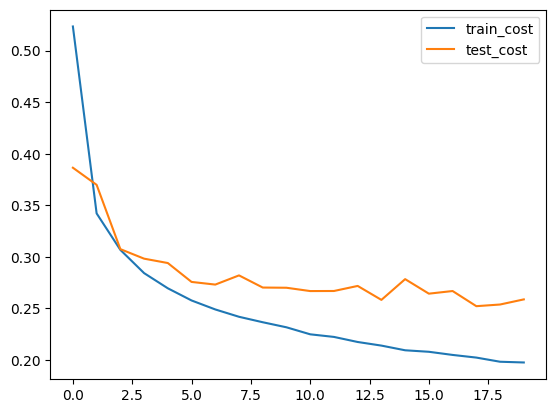

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0,len(train_cost_hist)),train_cost_hist,label='train_cost')
plt.plot(range(0,len(test_cost_hist)),test_cost_hist,label='test_cost')
plt.legend()


In [ ]:
'''
自定義資料隨機打亂順序
permutation = np.random.permutation(train_array.shape[0])
shuffled_train_array = train_array[permutation]
shuffled_train_label = np.array(train_label)[permutation]
'''

In [ ]:
'''
自定義資料，用迴圈製作批次效果
import numpy as np

data = [...]  # 假設這是你的樣本資料
labels = [...]  # 假設這是對應的標籤資料
batch_size = 32  # 批次大小

num_samples = len(train_array)
num_batches = num_samples // batch_size

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size
    batch_data = train_array[start_idx:end_idx]
    batch_labels = train_label[start_idx:end_idx]

    # 對批次資料進行處理
    # 例如，將它們傳遞給你的模型進行訓練或推論

    # 假設你使用 NumPy 來處理數據，你可以將批次資料和標籤轉換為 NumPy 陣列：
    batch_data_array = np.array(batch_data)
    batch_labels_array = np.array(batch_labels)

    # 在這裡對批次資料和標籤進行進一步的操作...

# 處理最後一個批次（可能大小不滿 batch_size）
if num_samples % batch_size != 0:
    start_idx = num_batches * batch_size
    batch_data = train_array[start_idx:]
    batch_labels = train_label[start_idx:]

    # 對最後一個批次資料進行處理
    # 例如，將它們傳遞給你的模型進行訓練或推論

    # 假設你使用 NumPy 來處理數據，你可以將最後一個批次資料和標籤轉換為 NumPy 陣列：
    batch_data_array = np.array(batch_data)
    batch_labels_array = np.array(batch_labels)

    # 在這裡對最後一個批次資料和標籤進行進一步的操作...
'''